# Scenario-2: Crayola Cement Foundation

**Established in 1996, Crayola Cement Foundation is one of the top competitors in the cement industries. They are proud of an exceptional record of efficiency. safety, and productivity while always soeking the newest techniques, systems, and equipment. They make precast and prestressed concrete products such as columns, raker beams, wall panels, spandrels, seat risers, double and inverted tees, hollow-core, and stairs.**

### Problem Statement:

**Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate, CCF wants to find out the compressive strength of the concrete based on these attributes.**

### Dataset Description:

**Attributes:**

* Cement: real [102.0, 540.0]

* BlastFurnace Slag: real [0.0, 359.4]

* FlyAsh: real [0.0, 200.100006]

* Water real [121.8, 247.0]

* Superplasticizer: real [0.0, 32.200001]

* CoarseAggregate: real [801.0, 1145.0]

* FineAggregate: real [594.0, 992.6]

* Age: integer [1, 365]

**Target Variable:**

* ConcreteCompressive Strength: real [2.33, 82.6]

**Tasks to be Performed:**

In order to attain the above goal below tasks must be performed:

* Read the dataset with no headers; Then put respective columns names and find the correlation between the features - **Beginner**

* Fit a Linear Regression model by applying 5-fold cross validation using scikit and calculate the scores and average accuracy - **Intermediate**

* Fit a Linear Regression model by applying 5-fold cross validation explicitly using KFold scikit and calculate the scores using mean absolute error as scoring parameter-**Advanced**

* Using LOOCV fit a Linear Regression model and calculate the average score using mean absolute error as scoring parameter- **Advanced**

* Apply Lasso Regression over the model and find R2_score and MAE - **Beginner** 
* Apply Ridge Regression over the model and find R2_score and MAE-**Beginner** 

* Apply RandomForestRegressor and Linear Regression over the data and evaluate. **Advanced**

**Topics Covered:**

* Linear Regression

* Lasso Regression

* Ridge Regression

* K-Fold

* RMSE

* Mean Absolute Error

* R-Square

* LOOCV

* Random Forest Regressor




In [1]:
url = 'https://www.kaggle.com/datasets/dsrivastava2020/concretecsv?select=concrete.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
import opendatasets as od
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyanshukumar02
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 11.1k/11.1k [00:00<00:00, 523kB/s]

In [1]:
import pandas as pd
import numpy as np

# Question-1: Read the dataset with no headers; Then put respective columns names and find the correlation between the features.

In [2]:
#cols=['Cement', 'Blast FurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer', 'CoarseAggregate', 'FineAggregate', 'Age', 'ConcreteCompressiveStrength']

In [132]:
#df = pd.read_csv('concretecsv/concrete.csv',header=None)
df = pd.read_csv('concretecsv/concrete.csv')
#df.columns=cols
df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [133]:
#df.drop(labels=0,axis=0,inplace=True)

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

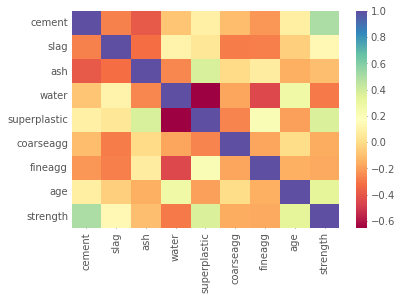

In [136]:
sns.heatmap(df.corr(),cmap='Spectral')
plt.show()

In [137]:
#let's Use pandas profiling over the dataset to generate a report
from pandas_profiling import ProfileReport
profileReport = ProfileReport(df,title ="Crayola Cenment Foundation data Analysis")
profileReport

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [138]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [139]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [140]:
X=df.drop('strength',axis=1)
y=df.strength

In [141]:
feat=X.columns

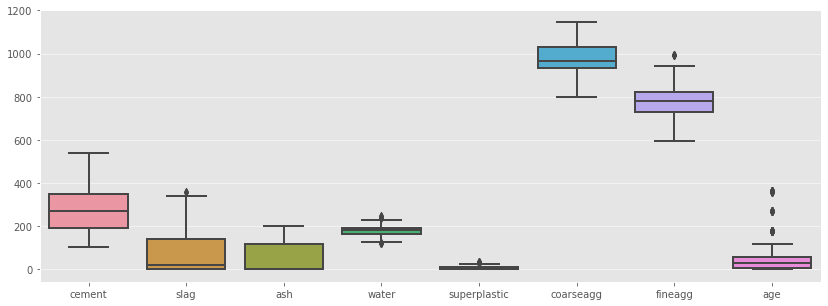

In [142]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
sns.boxplot(data=X)
plt.xticks(ticks=np.arange(len(feat)),labels=feat)
plt.show()

**Data is highly imbalanced.**

In [143]:
#df.drop_duplicates(inplace=True)

In [144]:
from sklearn.preprocessing import MinMaxScaler

In [145]:
# Scaling data after outlier removal
scl=MinMaxScaler()
scl_data=scl.fit_transform(df)

In [146]:
scl_data.shape

(1030, 9)

In [147]:
X=scl_data[:,:8]
y=scl_data[:,8]

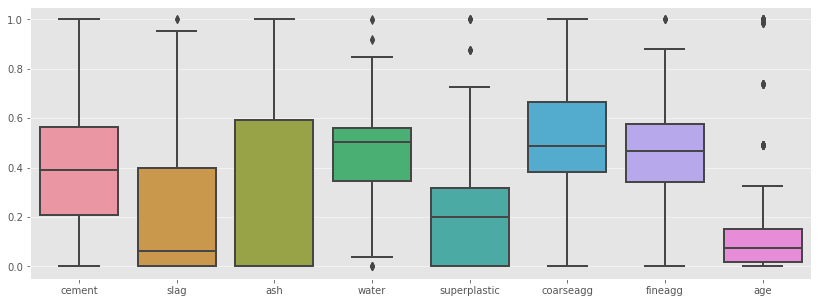

In [148]:
plt.style.use('ggplot')
plt.figure(figsize=(14,5))
sns.boxplot(data=X)
plt.xticks(ticks=np.arange(len(feat)),labels=feat)
plt.show()

In [149]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

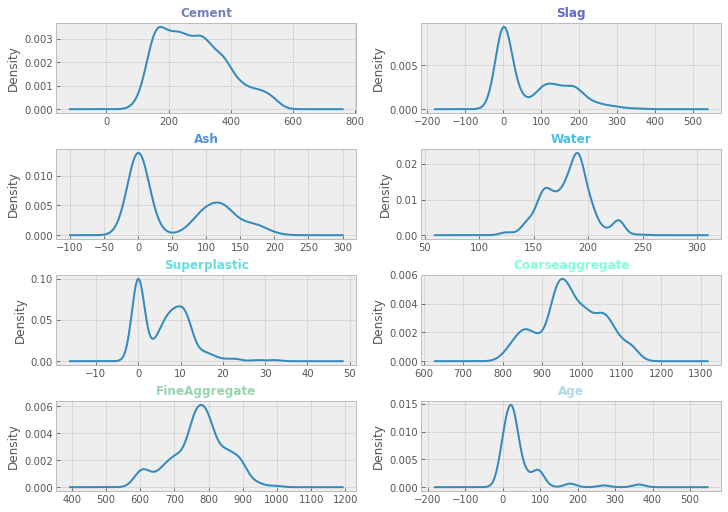

In [150]:
# KDE Plots
def format_text(size, color, weight='heavy'): 
    return {'size':size, 'color': '#'+color, 'weight':weight}

from matplotlib.gridspec import GridSpec
plt.style.use('bmh')
fig = plt.figure(figsize=(10,7), constrained_layout=True)
gs = GridSpec(4, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
df.cement.plot.kde() 
ax1.set_title('Cement',**format_text(12, '7480b8'))
ax2= fig.add_subplot(gs[0,1]) 
df.slag.plot.kde()
ax2.set_title('Slag',**format_text(12, '5e68ce'))
ax3= fig.add_subplot(gs[1,0])
df.ash.plot.kde() 
ax3.set_title('Ash',**format_text(12, '5390d9'))
ax4 = fig.add_subplot(gs[1,1])
df.water.plot.kde()
ax4.set_title('Water',**format_text(12, '48bfe3'))
ax5 = fig.add_subplot(gs [2,0])
df.superplastic.plot.kde()
ax5.set_title('Superplastic',**format_text(12, '64dfdf'))
ax6 = fig.add_subplot(gs[2,1])
df.coarseagg.plot.kde()
ax6.set_title('Coarseaggregate',**format_text(12, '80ffdb'))
ax7 = fig.add_subplot(gs [3,0])
df.fineagg.plot.kde()
ax7.set_title('FineAggregate',**format_text(12, '95d5b2'))
ax7 = fig.add_subplot(gs[3,1])
df.age.plot.kde()
ax7.set_title('Age',**format_text(12, 'AED9E8'))
plt.show()

In [151]:
# findUnique returns a dataframe with every column name, number of unique values, minimum values, maximum values 
# and total unique values present altogether in the dataset
def findUnique(df):
    unq=0
    unq_data={'Col_Name': [], 'Unique Counts': [], 'Max_value': [], 'Min_value':[]}
    for i in df.columns:
        unq_data['Col_Name'].append(i)
        unq_data['Unique Counts'].append(len(df[i].unique()))
        unq_data['Max_value'].append(df[i].max()) 
        unq_data['Min_value'].append(df[i].min())
        unq+=len(df[i].unique())
    return pd.DataFrame(unq_data), unq
u, ud=findUnique(df)
u.sort_values (by='Unique Counts')

Col_Name  Unique Counts  Max_value  Min_value
7           age             14      365.0       1.00
4  superplastic            111       32.2       0.00
2           ash            156      200.1       0.00
1          slag            185      359.4       0.00
3         water            195      247.0     121.80
0        cement            278      540.0     102.00
5     coarseagg            284     1145.0     801.00
6       fineagg            302      992.6     594.00
8      strength            845       82.6       2.33

# Question-2: Fit a Linear Regression model by applying 5-fold cross validation using scikit and calculate the scores and average accuracy.

In [152]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=101)

In [154]:
from sklearn.model_selection import cross_val_score
lin_model = LinearRegression()

In [155]:
# fitting a model and computing the score 5 consecutive times (with different splits each time) 
scores = cross_val_score(lin_model,X,y, cv=5)

In [156]:
print("Scores: %s"%scores)
print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(), scores.std()*2))

Scores: [0.60623239 0.64695454 0.61555076 0.61208575 0.52561826]
Accuracy: 0.60 (+/- 0.08)


# Question-3: Fit a Linear Regression model by applying 5-fold cross validation explicitly using KFold scikit and calculate the scores using mean absolute error as scoring parameter.

In [157]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=5) 
scores = cross_val_score(lin_model, X, y, cv=k_fold, scoring='neg_mean_absolute_error')

In [158]:
print("Scores: %s"%scores)
print("MAE: %0.2f (+/- %0.2f)"%(-scores.mean(), scores.std()*2))

Scores: [-0.09472517 -0.09835438 -0.11018175 -0.09746426 -0.11535321]
MAE: 0.10 (+/- 0.02)


# Question-4: Using LOOCV fit a Linear Regression model and calculate the average score using mean absolute error as scoring parameter.

In [159]:
from sklearn.model_selection import LeaveOneOut 
from sklearn.metrics import mean_absolute_error
# creating the Leave one out function 
loo = LeaveOneOut() 
loo.get_n_splits(X) 
scores=[] 
#printing the training and validation data
for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    model=LinearRegression() 
    model.fit(X_train,y_train)
    scores.append(mean_absolute_error(y_test, model.predict(X_test)))
print('Average Score: %.2f'%np.mean(scores))

Average Score: 0.10


# Question-5: Apply Lasso Regression over the model and find r2 score and MAE.

In [160]:
from sklearn.linear_model import Lasso

In [161]:
X.shape,y.shape

((1030, 8), (1030,))

In [162]:
lasso=Lasso(alpha=1e-5) 
lasso.fit(X,y)

Lasso(alpha=1e-05)

In [163]:
print('coeficients: %(coef)s, intercept: %(intercept).2f'%{'coef':lasso.coef_, 'intercept': lasso.intercept_})

coeficients: [ 0.64942546  0.46075114  0.21645734 -0.23830279  0.11668034  0.07397167
  0.09538155  0.51728   ], intercept: -0.05


In [164]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [165]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y, lasso.predict(X))) 
print('Mean Squared Error: %.2f'%mean_squared_error(y, lasso.predict(X))) 
print('R2-Score: %.2f' %r2_score(y, lasso.predict(X)))

Mean Absolute Error: 0.10
Mean Squared Error: 0.02
R2-Score: 0.62


# Question-6: Apply Ridge Regression over the model and find r2_score and MAE.

In [166]:
from sklearn.linear_model import Ridge

In [167]:
ridge=Ridge(alpha=1e-5)
ridge.fit(X,y)

Ridge(alpha=1e-05)

In [168]:
print('coeficients: %(coef)s, intercept: %(intercept).2f'%{'coef':ridge.coef_, 'intercept': ridge.intercept_})

coeficients: [ 0.65372097  0.46504619  0.21920497 -0.23383439  0.11722481  0.0775081
  0.10025855  0.51796201], intercept: -0.06


In [169]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y, ridge.predict(X))) 
print('Mean Squared Error: %.2f'%mean_squared_error(y, ridge.predict(X))) 
print('R2-Score: %.2f' %r2_score(y, ridge.predict(X)))

Mean Absolute Error: 0.10
Mean Squared Error: 0.02
R2-Score: 0.62


# Question-7: Apply RandomForestRegressor and Linear Regression over the data and evaluate.

In [170]:
def evaluate_model(x,y,model_name, model):
    """
    X: Features
    y: Target Variable
    model_name: String, model name 
    model: model object created
    """
    evl={'Model': [], 'R2_Score': [], 'MSE':[], 'MAE':[]} 
    evl['Model'].append(model_name)
    evl['R2_Score'].append(r2_score(y, model.predict(X)))
    evl['MSE'].append(mean_absolute_error(y, model.predict(X))) 
    evl['MAE'].append(mean_squared_error(y, model.predict(X))) 
    return evl

In [171]:
revl=evaluate_model(X,y, 'Ridge Model',ridge)
levl=evaluate_model(X,y, 'Lasso Model',lasso)

In [172]:
revl

{'Model': ['Ridge Model'],
 'R2_Score': [0.6155198704138478],
 'MSE': [0.10233392945214188],
 'MAE': [0.01663707835112471]}

In [173]:
levl

{'Model': ['Lasso Model'],
 'R2_Score': [0.6155160026657782],
 'MSE': [0.1023624354308898],
 'MAE': [0.01663724571485231]}

In [174]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression

In [175]:
rfr=RandomForestRegressor()
rfr.fit(X,y)

RandomForestRegressor()

In [176]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y, rfr.predict(X))) 
print('Mean Squared Error: %.2f'%mean_squared_error(y, rfr.predict(X))) 
print('R2-Score: %.2f' %r2_score(y, rfr.predict(X)))

Mean Absolute Error: 0.02
Mean Squared Error: 0.00
R2-Score: 0.99


In [177]:
lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [178]:
print('Mean Absolute Error: %.2f'%mean_absolute_error(y, lr.predict(X))) 
print('Mean Squared Error: %.2f'%mean_squared_error(y, lr.predict(X))) 
print('R2-Score: %.2f' %r2_score(y, lr.predict(X)))

Mean Absolute Error: 0.10
Mean Squared Error: 0.02
R2-Score: 0.62


In [179]:
# Append data of one dictionary to another 
def append_data(data1,data2):
    for i in data1.keys():
        data2[i].extend(data1[i])
    return data2

In [180]:
evl=append_data(revl,levl)
evl=append_data(evaluate_model(X,y, 'RandomForestRegressor',rfr),evl)
evl=append_data(evaluate_model(X,y, 'Linear Regression',lr),evl)

In [181]:
evl

{'Model': ['Lasso Model',
  'Ridge Model',
  'RandomForestRegressor',
  'Linear Regression'],
 'R2_Score': [0.6155160026657782,
  0.6155198704138478,
  0.9862086702321349,
  0.6155198704142721],
 'MSE': [0.1023624354308898,
  0.10233392945214188,
  0.015163157620020407,
  0.10233391934996654],
 'MAE': [0.01663724571485231,
  0.01663707835112471,
  0.0005967731912729633,
  0.016637078351106345]}

In [182]:
# Let's Plot the model
from matplotlib.gridspec import GridSpec
def plot_regress(df): 
    sns.set_palette(sns.color_palette("rocket"))
    super_title={'size' :18, 'color': '#c5283d', 'weight': 'extra bold'} 
    sub_title={'size':12, 'color': '#e06777', 'weight': 'bold'}
    colors=np.array([[156, 137, 184], [239, 195, 230], [184, 198, 221],[231, 115, 171]]) 
    colors=colors/255 #Matplotlib RGB color range is from 0-1
    data=pd.DataFrame(df)
    fig=plt.figure(figsize=(10,7), constrained_layout=True)
    gs=GridSpec(2, 2, figure=fig)
    ax1=fig.add_subplot(gs[0, 0]) 
    ax1.barh(data.Model, data.R2_Score, color=colors) 
    ax1.tick_params(labelbottom=True, labelleft=True)
    ax1.set_xlim(0,1)
    ax1.set_title('R2 Score',**sub_title)
    ax2=fig.add_subplot(gs[0, 1])
    ax2.barh(data.Model, data.MAE, color=colors)
    ax2.tick_params(labelbottom=True, labelleft=False)
    ax2.set_xlim(0,0.5)
    ax2.set_title('Mean Absolute Error',**sub_title) 
    ax3= fig.add_subplot(gs[1, :]) 
    ax3.barh(data.Model, data.MSE, color=colors)
    ax3.tick_params(labelbottom=True, labelleft=True)
    ax3.set_xlim(0,0.2)
    ax3.set_title('Mean Squared Error', **sub_title)
    fig.suptitle("Evaluation", **super_title)
    ax4.tick_params(labelbottom=True, labelleft=False)
    plt.show()

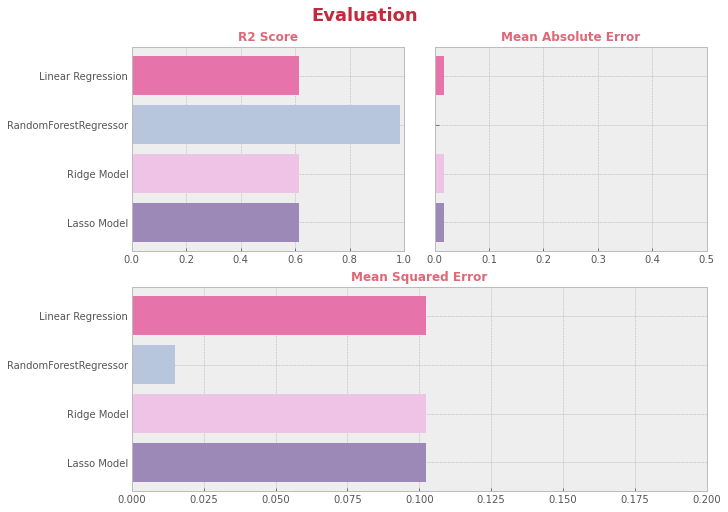

In [183]:
plot_regress(evl)

**Conclussion:** Overall, RandomForestRegressor is best Model.